## SetUp

In [24]:
!pip install tf-agents==0.3.0
!pip uninstall tensorflow-probability -y
!pip install tensorflow-probability==0.7.0

     |████████████████████████████████| 839kB 2.7MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
  Found existing installation: gin-config 0.3.0
    Uninstalling gin-config-0.3.0:
      Successfully uninstalled gin-config-0.3.0
Uninstalling tensorflow-probability-0.7.0:
  Successfully uninstalled tensorflow-probability-0.7.0
     |████████████████████████████████| 983kB 2.7MB/s 
  Found existing installation: tensorflow-probability 0.11.0
    Uninstalling tensorflow-probability-0.11.0:
      Successfully uninstalled tensorflow-probability-0.11.0


In [51]:
!pip uninstall lucid -y
!pip install git+https://github.com/tensorflow/lucid.git#egg=lucid

Uninstalling lucid-0.3.8:
  Successfully uninstalled lucid-0.3.8
  Cloning https://github.com/tensorflow/lucid.git to /tmp/pip-install-0em4i8ob/lucid
  Running command git clone -q https://github.com/tensorflow/lucid.git /tmp/pip-install-0em4i8ob/lucid
  Created wheel for lucid: filename=lucid-0.3.9-cp36-none-any.whl size=159169 sha256=1b606b8e86d574adcff5c1ca848a6bb7dc698a5a934f8380c18767716c59caf0
  Stored in directory: /tmp/pip-ephem-wheel-cache-eedszbhu/wheels/64/c2/51/7238e75f457453774587708b21cd3cf32f9a86456648688634
Successfully built lucid


In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf

In [3]:
tf.compat.v1.disable_eager_execution()

In [4]:
from tf_agents.trajectories.time_step import TimeStep
from tf_agents.specs.tensor_spec import TensorSpec
from tf_agents.specs.tensor_spec import TensorSpec
from tf_agents.specs.tensor_spec import BoundedTensorSpec
from tf_agents.networks import actor_distribution_network

import lucid.modelzoo.vision_models as models

In [34]:
import joblib

import lucid.modelzoo.vision_models as models
from lucid.misc.io import show
import lucid.misc.io.showing as showing
from lucid.misc.channel_reducer import ChannelReducer
import lucid.optvis.param as param
import lucid.optvis.objectives as objectives
import lucid.optvis.render as render
from lucid.misc.io import show, load
from lucid.misc.io.reading import read
from lucid.misc.io.showing import _image_url
import lucid.scratch.web.svelte as lucid_svelte
from lucid.misc.gradient_override import gradient_override_map
from lucid.scratch.rl_util import *
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.decomposition.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.decomposition. Anything that cannot be imported from sklearn.decomposition is now part of the private API.
  warnings.warn(message, FutureWarning)


In [37]:
import numpy as np

## Load agent inference graph

In [7]:
from google.colab import auth
auth.authenticate_user()

In [5]:
cpt_name = "gs://pref_extract_train_output/ppo_search_log_fix_1455626/10/train"

In [8]:
cpt_var_names = tf.compat.v1.train.list_variables(cpt_name)

In [9]:
[name for name in cpt_var_names if (("bias" in name[0]) or ("kernel" in name[0])) and not ("OPTIMIZER" in name[0])]

[('agent/_actor_net/_encoder/_postprocessing_layers/0/bias/.ATTRIBUTES/VARIABLE_VALUE',
  [16]),
 ('agent/_actor_net/_encoder/_postprocessing_layers/0/kernel/.ATTRIBUTES/VARIABLE_VALUE',
  [3, 3, 6, 16]),
 ('agent/_actor_net/_encoder/_postprocessing_layers/1/bias/.ATTRIBUTES/VARIABLE_VALUE',
  [32]),
 ('agent/_actor_net/_encoder/_postprocessing_layers/1/kernel/.ATTRIBUTES/VARIABLE_VALUE',
  [3, 3, 16, 32]),
 ('agent/_actor_net/_encoder/_postprocessing_layers/3/bias/.ATTRIBUTES/VARIABLE_VALUE',
  [64]),
 ('agent/_actor_net/_encoder/_postprocessing_layers/3/kernel/.ATTRIBUTES/VARIABLE_VALUE',
  [10752, 64]),
 ('agent/_actor_net/_projection_networks/_projection_layer/bias/.ATTRIBUTES/VARIABLE_VALUE',
  [4]),
 ('agent/_actor_net/_projection_networks/_projection_layer/kernel/.ATTRIBUTES/VARIABLE_VALUE',
  [64, 4]),
 ('agent/_value_net/_encoder/_postprocessing_layers/0/bias/.ATTRIBUTES/VARIABLE_VALUE',
  [16]),
 ('agent/_value_net/_encoder/_postprocessing_layers/0/kernel/.ATTRIBUTES/VARIABLE

In [10]:
tf.reset_default_graph()

In [11]:
input_shape = [60, 100, 6]

my_input = tf.placeholder(tf.float32, shape=[None] + input_shape, name="my_input")

act_vals = actor_distribution_network.ActorDistributionNetwork(
    input_tensor_spec=TensorSpec(shape=(60, 100, 6)), 
    output_tensor_spec=BoundedTensorSpec((), tf.int32, 0, 3), 
    conv_layer_params = [[16, 3, 2], [32, 3, 2]], 
    fc_layer_params = [64])(my_input, step_type=None, network_state=None)

[tensor for op in tf.get_default_graph().get_operations() for tensor in op.values()]

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


[<tf.Tensor 'my_input:0' shape=(?, 60, 100, 6) dtype=float32>,
 <tf.Tensor 'ActorDistributionNetwork/EncodingNetwork/EncodingNetwork/conv2d/kernel/Initializer/random_uniform/shape:0' shape=(4,) dtype=int32>,
 <tf.Tensor 'ActorDistributionNetwork/EncodingNetwork/EncodingNetwork/conv2d/kernel/Initializer/random_uniform/min:0' shape=() dtype=float32>,
 <tf.Tensor 'ActorDistributionNetwork/EncodingNetwork/EncodingNetwork/conv2d/kernel/Initializer/random_uniform/max:0' shape=() dtype=float32>,
 <tf.Tensor 'ActorDistributionNetwork/EncodingNetwork/EncodingNetwork/conv2d/kernel/Initializer/random_uniform/RandomUniform:0' shape=(3, 3, 6, 16) dtype=float32>,
 <tf.Tensor 'ActorDistributionNetwork/EncodingNetwork/EncodingNetwork/conv2d/kernel/Initializer/random_uniform/sub:0' shape=() dtype=float32>,
 <tf.Tensor 'ActorDistributionNetwork/EncodingNetwork/EncodingNetwork/conv2d/kernel/Initializer/random_uniform/mul:0' shape=(3, 3, 6, 16) dtype=float32>,
 <tf.Tensor 'ActorDistributionNetwork/Encodin

In [12]:
cpt_var_info = tf.compat.v1.train.list_variables(cpt_name)
cpt_var_info = [var for var in cpt_var_info if (("bias" in var[0]) or ("kernel" in var[0])) and not ("OPTIMIZER" in var[0]) and not ("_value_net" in var[0])]

shape_to_cpt_var_name = {tuple(var[1]): var[0] for var in cpt_var_info}
shape_to_cpt_var_name

{(3,
  3,
  6,
  16): 'agent/_actor_net/_encoder/_postprocessing_layers/0/kernel/.ATTRIBUTES/VARIABLE_VALUE',
 (3,
  3,
  16,
  32): 'agent/_actor_net/_encoder/_postprocessing_layers/1/kernel/.ATTRIBUTES/VARIABLE_VALUE',
 (4,): 'agent/_actor_net/_projection_networks/_projection_layer/bias/.ATTRIBUTES/VARIABLE_VALUE',
 (16,): 'agent/_actor_net/_encoder/_postprocessing_layers/0/bias/.ATTRIBUTES/VARIABLE_VALUE',
 (32,): 'agent/_actor_net/_encoder/_postprocessing_layers/1/bias/.ATTRIBUTES/VARIABLE_VALUE',
 (64,): 'agent/_actor_net/_encoder/_postprocessing_layers/3/bias/.ATTRIBUTES/VARIABLE_VALUE',
 (64,
  4): 'agent/_actor_net/_projection_networks/_projection_layer/kernel/.ATTRIBUTES/VARIABLE_VALUE',
 (10752,
  64): 'agent/_actor_net/_encoder/_postprocessing_layers/3/kernel/.ATTRIBUTES/VARIABLE_VALUE'}

In [13]:
current_vars = tf.get_collection(tf.GraphKeys.VARIABLES)
current_vars

shape_to_current_var_name = {tuple(var.get_shape().as_list()): var.name[:-2] for var in current_vars}
shape_to_current_var_name

Instructions for updating:
Use `tf.GraphKeys.GLOBAL_VARIABLES` instead.


Instructions for updating:
Use `tf.GraphKeys.GLOBAL_VARIABLES` instead.


{(3,
  3,
  6,
  16): 'ActorDistributionNetwork/EncodingNetwork/EncodingNetwork/conv2d/kernel',
 (3,
  3,
  16,
  32): 'ActorDistributionNetwork/EncodingNetwork/EncodingNetwork/conv2d_1/kernel',
 (4,): 'ActorDistributionNetwork/CategoricalProjectionNetwork/logits/bias',
 (16,): 'ActorDistributionNetwork/EncodingNetwork/EncodingNetwork/conv2d/bias',
 (32,): 'ActorDistributionNetwork/EncodingNetwork/EncodingNetwork/conv2d_1/bias',
 (64,): 'ActorDistributionNetwork/EncodingNetwork/EncodingNetwork/dense/bias',
 (64,
  4): 'ActorDistributionNetwork/CategoricalProjectionNetwork/logits/kernel',
 (10752,
  64): 'ActorDistributionNetwork/EncodingNetwork/EncodingNetwork/dense/kernel'}

In [14]:
var_name_to_prev_var_name = {}

for shape in shape_to_current_var_name:
    var_name_to_prev_var_name[shape_to_current_var_name[shape]] = shape_to_cpt_var_name[shape]

var_name_to_prev_var_name

{'ActorDistributionNetwork/CategoricalProjectionNetwork/logits/bias': 'agent/_actor_net/_projection_networks/_projection_layer/bias/.ATTRIBUTES/VARIABLE_VALUE',
 'ActorDistributionNetwork/CategoricalProjectionNetwork/logits/kernel': 'agent/_actor_net/_projection_networks/_projection_layer/kernel/.ATTRIBUTES/VARIABLE_VALUE',
 'ActorDistributionNetwork/EncodingNetwork/EncodingNetwork/conv2d/bias': 'agent/_actor_net/_encoder/_postprocessing_layers/0/bias/.ATTRIBUTES/VARIABLE_VALUE',
 'ActorDistributionNetwork/EncodingNetwork/EncodingNetwork/conv2d/kernel': 'agent/_actor_net/_encoder/_postprocessing_layers/0/kernel/.ATTRIBUTES/VARIABLE_VALUE',
 'ActorDistributionNetwork/EncodingNetwork/EncodingNetwork/conv2d_1/bias': 'agent/_actor_net/_encoder/_postprocessing_layers/1/bias/.ATTRIBUTES/VARIABLE_VALUE',
 'ActorDistributionNetwork/EncodingNetwork/EncodingNetwork/conv2d_1/kernel': 'agent/_actor_net/_encoder/_postprocessing_layers/1/kernel/.ATTRIBUTES/VARIABLE_VALUE',
 'ActorDistributionNetwork

## Export model to lucid

In [15]:
tf.train.warm_start(cpt_name, var_name_to_prev_var_name=var_name_to_prev_var_name)
init_op = tf.global_variables_initializer()

INFO:tensorflow:Warm-starting from: gs://pref_extract_train_output/ppo_search_log_fix_1455626/10/train


INFO:tensorflow:Warm-starting from: gs://pref_extract_train_output/ppo_search_log_fix_1455626/10/train


INFO:tensorflow:Warm-starting variables only in TRAINABLE_VARIABLES.


INFO:tensorflow:Warm-starting variables only in TRAINABLE_VARIABLES.


INFO:tensorflow:Warm-started 8 variables.


INFO:tensorflow:Warm-started 8 variables.


In [27]:
with tf.Session() as sess:
  sess.run(init_op)

  models.Model.suggest_save_args()
  
  models.Model.save(
    input_name='my_input',
    image_shape=[60, 100, 3],
    output_names=['ActorDistributionNetwork/CategoricalProjectionNetwork/Categorical/probs'],
    image_value_range=[0,1],
    save_url="lucid_save_model.pb"
  )

Inferred: input_name = my_input (because it was the only Placeholder in the graph_def)
Inferred: image_shape = [60, 100, 6]
Inferred: output_names = ['ActorDistributionNetwork/CategoricalProjectionNetwork/Categorical/probs']  (because those are all the Softmax ops)
# Please sanity check all inferred values before using this code.
# Incorrect `image_value_range` is the most common cause of feature visualization bugs! Most methods will fail silently with incorrect visualizations!
Model.save(
    input_name='my_input',
    image_shape=[60, 100, 6],
    output_names=['ActorDistributionNetwork/CategoricalProjectionNetwork/Categorical/probs'],
    image_value_range=_,                   # TODO (eg. '[-1, 1], [0, 1], [0, 255], or [-117, 138]')
  )
INFO:tensorflow:Froze 8 variables.


INFO:tensorflow:Froze 8 variables.


INFO:tensorflow:Converted 8 variables to const ops.


INFO:tensorflow:Converted 8 variables to const ops.


## Feature Visualization

In [28]:
model = models.Model.load("lucid_save_model.pb")

In [29]:
import lucid.optvis.render as render

In [31]:
render.render_vis(model, "ActorDistributionNetwork/EncodingNetwork/EncodingNetwork/conv2d:0")

ValueError: ignored

## NMF Technique from building blocks / rl vision

In [33]:
!gsutil cp gs://pref_extract_train_output/ppo_search_log_fix_1455626/10/exp_data_500.pkl experienceData.pkl

Copying gs://pref_extract_train_output/ppo_search_log_fix_1455626/10/exp_data_500.pkl...
| [1 files][ 68.7 MiB/ 68.7 MiB]                                                
Operation completed over 1 objects/68.7 MiB.                                     


In [36]:
all_raw_data = joblib.load('experienceData.pkl')

In [39]:
# Data Loader
xs = []
ys = []

for data in all_raw_data:
    for i in range(data.observation.shape[0]):
        x = np.copy(data.observation[i])
        label_object = data.policy_info['satisfaction'][i]
        if len(label_object) == 0: # When label is empty, i.e. human is dead, skip frame
            continue
        else:
            y = label_object['object_angle'] < 90 or label_object['object_angle'] > 270

        xs.append(x)
        ys.append(y)

ys = np.array(ys).astype(int)
xs = np.array(xs)

print("xs", xs.shape, "ys", ys.shape)
print("ys 1", np.sum(ys))

xs (400, 60, 100, 6) ys (400,)
ys 1 94


In [41]:
num_obs = 4000
some_observations = xs[0:num_obs]
some_ys = ys[0:num_obs]

Potential output layers

* `'ActorDistributionNetwork/EncodingNetwork/EncodingNetwork/dense/BiasAdd'`
* `'ActorDistributionNetwork/CategoricalProjectionNetwork/logits/BiasAdd'`
* `'ActorDistributionNetwork/CategoricalProjectionNetwork/Categorical/probs'`

In [91]:
output_layer_name = 'ActorDistributionNetwork/CategoricalProjectionNetwork/logits/BiasAdd'
hidden_layer_name = "ActorDistributionNetwork/EncodingNetwork/EncodingNetwork/conv2d/Relu"
num_features = 3

In [92]:
nmf_activations =  LayerNMF(model, hidden_layer_name, some_observations, features=num_features)
nmf_attributions = LayerNMF(model, hidden_layer_name, some_observations, features=num_features, attr_layer_name=output_layer_name)

In [93]:
with tf.Graph().as_default(), tf.Session():
  t_input = t_input = tf.placeholder_with_default(some_observations, some_observations.shape, name="lucid_placeholder")
  T = render.import_model(model, t_input, t_input)
  conv_acts = T(hidden_layer_name).eval()

In [62]:
def reduce_and_norm(to_reduce, nmf):
  reduced = nmf.transform(np.abs(to_reduce))

  nmf_norms = nmf.channel_dirs.sum(-1)
  reduced *= nmf_norms[None, None, None]

  normalize_by = np.median(reduced.max(axis=(-3, -2, -1)))
  print("normalize_by", normalize_by)
  if normalize_by != 0:
    reduced /= normalize_by # normalize to make the visualization balanced, may need tweaking
  reduced = np.abs(reduced)

  return reduced

In [56]:
def show_with_obs(obs, reduced, num_to_show):
  start = 0 #random.randint(0, obs.shape[0]-num_to_show)
  print("Color channels")
  show(zoom_to(obs[start:start+num_to_show, :, :, :3], 200))
  print("Visualization")
  show(zoom_to(reduced[start:start+num_to_show], 200))

normalize_by 1.9053190530959854
Color channels



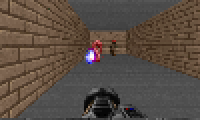
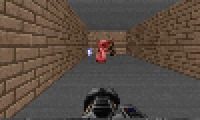
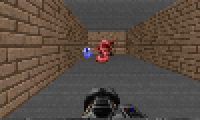
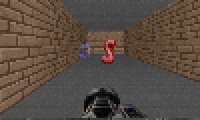
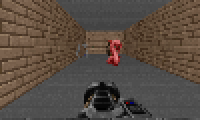
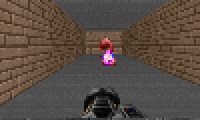
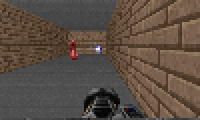
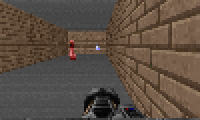
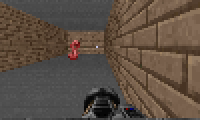
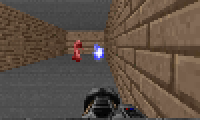

Visualization



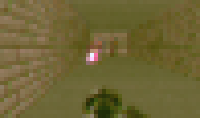
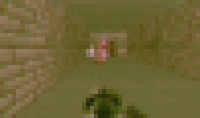
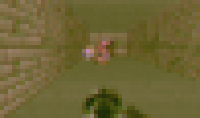
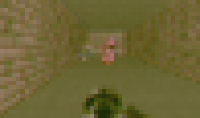
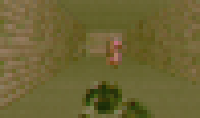
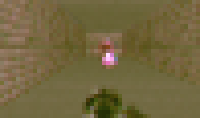
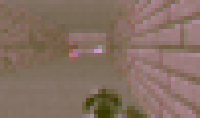
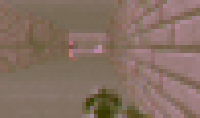
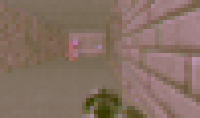
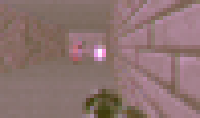

In [85]:
# NMF on attributions, optimises activations
reduced_train_attri_opt_act = reduce_and_norm(conv_acts, nmf_attributions)
show_with_obs(some_observations, reduced_train_attri_opt_act, 10)

normalize_by 3.6970795618719947
Color channels



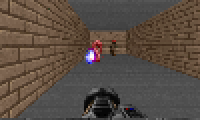
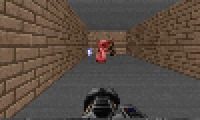
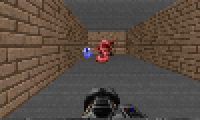
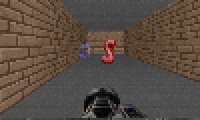
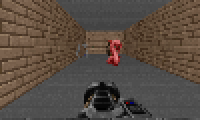
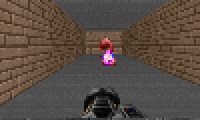
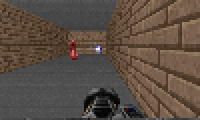
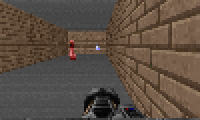
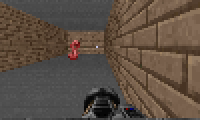
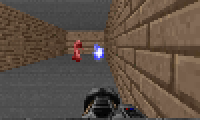
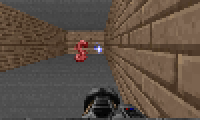
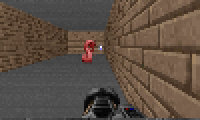
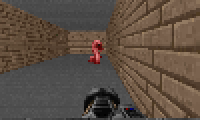
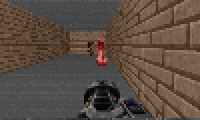
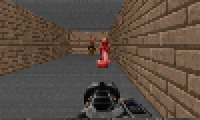
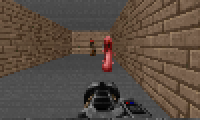
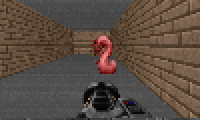
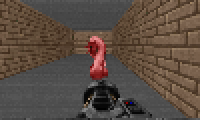
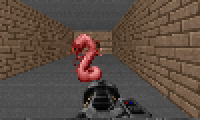
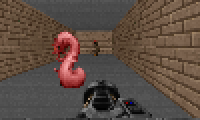

Visualization



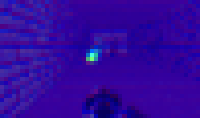
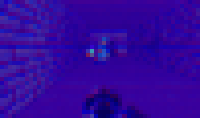
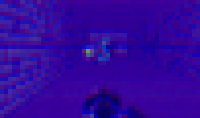
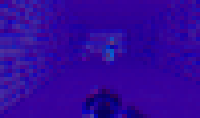
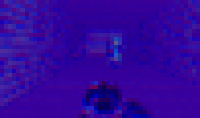
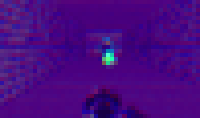
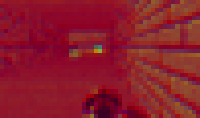
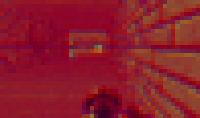
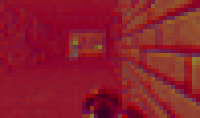
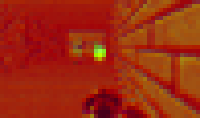
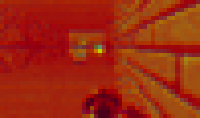
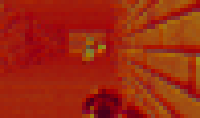
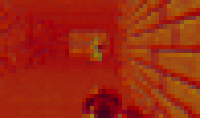
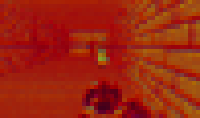
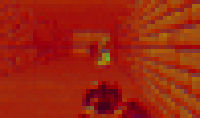
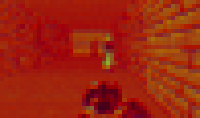
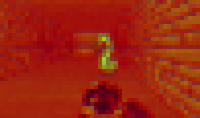
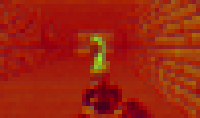
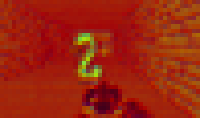
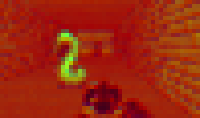

In [94]:
# NMF on activations, optimises activations
reduced_train_act_opt_act = reduce_and_norm(conv_acts, nmf_activations)
show_with_obs(some_observations, reduced_train_act_opt_act, 20)